<a href="https://colab.research.google.com/github/mauricioaalmeida/ONE-ML/blob/main/Desafio_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, KFold, StratifiedKFold, LeaveOneOut
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score, precision_recall_curve


from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



import pickle

# Aula 1

### Desafio 1

Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [2]:
url = 'https://raw.githubusercontent.com/mauricioaalmeida/ONE-ML/refs/heads/main/data/diabetes.csv'
dados = pd.read_csv(url)

In [3]:
dados.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   glicemia              394 non-null    int64  
 1   pressao_sanguinea     394 non-null    int64  
 2   dobra_cutane_triceps  394 non-null    int64  
 3   insulina              394 non-null    float64
 4   imc                   394 non-null    float64
 5   diabetes              394 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 18.6 KB


In [5]:
colunas = dados.columns.tolist()
col_categoricas = dados.select_dtypes(include=['object']).columns.tolist()
col_numericas = dados.select_dtypes(include=['number']).columns.tolist()
col_alvo='diabetes'
colunas.remove(col_alvo)
print (col_categoricas)
print (col_numericas)

[]
['glicemia', 'pressao_sanguinea', 'dobra_cutane_triceps', 'insulina', 'imc', 'diabetes']


### Desafio 2

Realize a divisão dos dados entre treino e teste.

In [6]:
x = dados.drop(col_alvo, axis=1)
y = dados[col_alvo]

In [7]:
x, x_test, y, y_test = train_test_split(x, y, test_size=0.05, stratify=y, random_state=5)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, stratify=y, random_state=5)

### Desafio 3

Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

In [8]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(x_train, y_train)
print(f'Acurácia no conjunto de treino : {tree.score(x_train, y_train)*100:.4f}%')
print(f'Acurácia no conjunto de valid  : {tree.score(x_val, y_val)*100:.4f}%')

Acurácia no conjunto de treino : 75.7143%
Acurácia no conjunto de valid  : 77.6596%


In [9]:
modelo_rf = RandomForestClassifier(max_depth = 2)
modelo_rf.fit(x_train, y_train)
print(f'Acurácia no conjunto de treino : {modelo_rf.score(x_train, y_train)*100:.4f}%')
print(f'Acurácia no conjunto de valid  : {modelo_rf.score(x_val, y_val)*100:.4f}%')

Acurácia no conjunto de treino : 73.2143%
Acurácia no conjunto de valid  : 71.2766%


### Desafio 4

Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

In [10]:
col_result = ['Diabetico','Não diabetico']

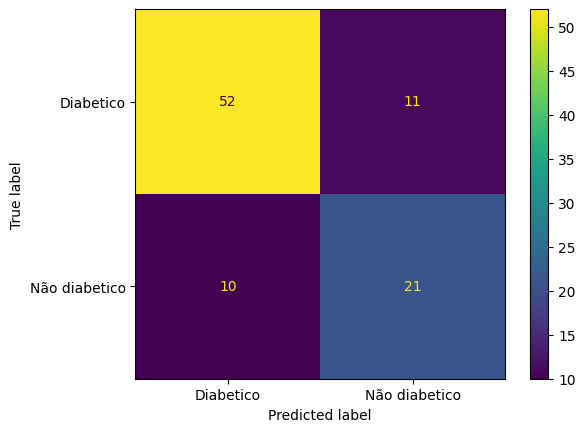

In [11]:
y_previsto_tree = tree.predict(x_val)
matriz_confusao_tree = confusion_matrix(y_val, y_previsto_tree)
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao_tree, display_labels=col_result)
visualizacao.plot();

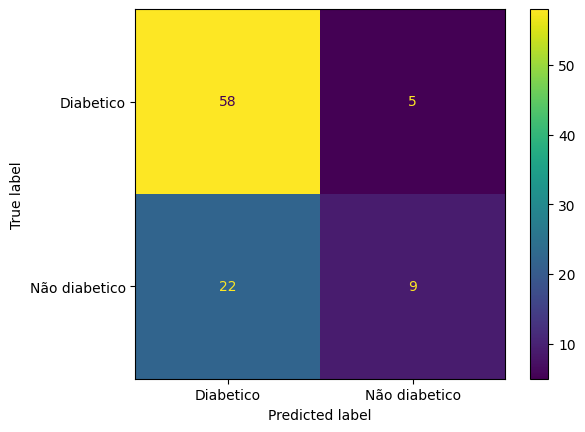

In [12]:
y_previsto_rf = modelo_rf.predict(x_val)
matriz_confusao_rf = confusion_matrix(y_val, y_previsto_rf)
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao_rf, display_labels=col_result)
visualizacao.plot();

# Aula 2

### Desafio 1

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados no desafio da aula 1.

In [13]:
print(f'Acurácia : {accuracy_score(y_val, y_previsto_tree)*100:.4f}%')
print(f'Recall    : {recall_score(y_val, y_previsto_tree)*100:.4f}%')
print(f'Precisão  : {precision_score(y_val, y_previsto_tree)*100:.4f}%')
print(f'F1-Score  : {f1_score(y_val, y_previsto_tree)*100:.4f}%')

Acurácia : 77.6596%
Recall    : 67.7419%
Precisão  : 65.6250%
F1-Score  : 66.6667%


### Desafio 2

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

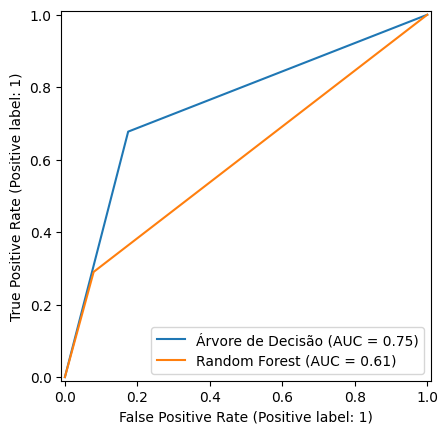

In [14]:
fig, ax = plt.subplots()
RocCurveDisplay.from_predictions(y_val, y_previsto_tree, name = 'Árvore de Decisão', ax=ax)
RocCurveDisplay.from_predictions(y_val, y_previsto_rf, name = 'Random Forest', ax=ax)
plt.show()

### Desafio 3

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

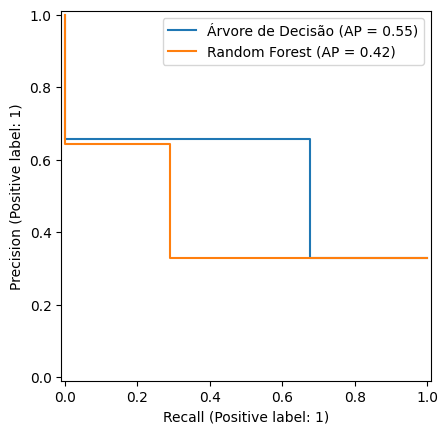

In [15]:
fig, ax = plt.subplots()
PrecisionRecallDisplay.from_predictions(y_val, y_previsto_tree, name = 'Árvore de Decisão', ax=ax)
PrecisionRecallDisplay.from_predictions(y_val, y_previsto_rf, name = 'Random Forest', ax=ax)
plt.legend(loc = 'upper right')
plt.show()

### Desafio 4

Gere os relatórios de métricas dos modelos de classificação gerados no desafio da aula 1.

In [16]:
print('Indicador    :   Árvore      |  Random Forest')
print('=========================================================')
print(f'Acurácia     : {accuracy_score(y_val, y_previsto_tree)*100:8.4f}%     |    {accuracy_score(y_val, y_previsto_rf)*100:8.4f}%')
print(f'Recall       : {recall_score(y_val, y_previsto_tree)*100:8.4f}%     |    {recall_score(y_val, y_previsto_rf)*100:8.4f}%')
print(f'Precisão     : {precision_score(y_val, y_previsto_tree)*100:8.4f}%     |    {precision_score(y_val, y_previsto_rf)*100:8.4f}%')
print(f'F1-Score     : {f1_score(y_val, y_previsto_tree)*100:8.4f}%     |    {f1_score(y_val, y_previsto_rf)*100:8.4f}%')
print(f'ROC AUC      : {roc_auc_score(y_val, y_previsto_tree)*100:8.4f}%     |    {roc_auc_score(y_val, y_previsto_rf)*100:8.4f}%')
print(f'PR AUC       : {average_precision_score(y_val, y_previsto_tree)*100:8.4f}%     |    {average_precision_score(y_val, y_previsto_rf)*100:8.4f}%')

Indicador    :   Árvore      |  Random Forest
Acurácia     :  77.6596%     |     71.2766%
Recall       :  67.7419%     |     29.0323%
Precisão     :  65.6250%     |     64.2857%
F1-Score     :  66.6667%     |     40.0000%
ROC AUC      :  75.1408%     |     60.5479%
PR AUC       :  55.0939%     |     42.0678%


In [17]:
print(classification_report(y_val, y_previsto_tree))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        63
           1       0.66      0.68      0.67        31

    accuracy                           0.78        94
   macro avg       0.75      0.75      0.75        94
weighted avg       0.78      0.78      0.78        94



In [18]:
print(classification_report(y_val, y_previsto_rf))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81        63
           1       0.64      0.29      0.40        31

    accuracy                           0.71        94
   macro avg       0.68      0.61      0.61        94
weighted avg       0.70      0.71      0.68        94



# Aula 3

### Desafio 1

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



In [22]:
def intervalo_conf(resultados,score_list):
  r = {}
  for score in score_list:
    media = resultados[score].mean()
    desvio_padrao = resultados[score].std()
    r[score] = f'[ {media-2*desvio_padrao:.6f}, {min(media+2*desvio_padrao, 1):.6f} ]'
  return r

### Desafio 2

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

In [28]:
print('KFold 5 - Modelo Árvore:')
modelo_tree = DecisionTreeClassifier(max_depth = 5)
kf = KFold(n_splits=5, shuffle=True, random_state=5, )
cv_resultados = cross_validate(modelo_tree, x, y, cv=kf, scoring = ('accuracy', 'recall','precision', 'f1', 'roc_auc'))
intervalo_conf(cv_resultados,['test_accuracy', 'test_recall','test_precision', 'test_roc_auc','test_f1' ])

KFold 5 - Modelo Árvore:


{'test_accuracy': '[ 0.612950, 0.745249 ]',
 'test_recall': '[ 0.005640, 0.843381 ]',
 'test_precision': '[ 0.190398, 1.000000 ]',
 'test_roc_auc': '[ 0.586769, 0.830204 ]',
 'test_f1': '[ 0.181927, 0.682808 ]'}

In [27]:
print('KFold 5 -Modelo Random Forest:')
modelo_rf = DecisionTreeClassifier(max_depth = 5)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5, )
cv_resultados = cross_validate(modelo_tree, x, y, cv=kf, scoring = ('accuracy', 'recall','precision', 'f1', 'roc_auc'))
intervalo_conf(cv_resultados,['test_accuracy', 'test_recall','test_precision', 'test_roc_auc','test_f1' ])

KFold 5 -Modelo Random Forest:


{'test_accuracy': '[ 0.561770, 0.775455 ]',
 'test_recall': '[ -0.007998, 0.821331 ]',
 'test_precision': '[ 0.272648, 0.684143 ]',
 'test_roc_auc': '[ 0.619993, 0.747590 ]',
 'test_f1': '[ 0.112983, 0.733209 ]'}

In [ ]:
print('Modelo Random Forest:')
modelo_rf = DecisionTreeClassifier(max_depth = 5)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5, )
cv_resultados = cross_validate(modelo_tree, x, y, cv=skf, scoring = ('accuracy', 'recall','precision', 'f1', 'roc_auc'))
intervalo_conf(cv_resultados,['test_accuracy', 'test_recall','test_precision', 'test_roc_auc','test_f1' ])

### Desafio 3

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

In [29]:
print('StratifiedKFold 10 - Modelo Árvore:')
modelo_tree = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5, )
cv_resultados = cross_validate(modelo_tree, x, y, cv=skf, scoring = ('accuracy', 'recall','precision', 'f1', 'roc_auc'))
intervalo_conf(cv_resultados,['test_accuracy', 'test_recall','test_precision', 'test_roc_auc','test_f1' ])

StratifiedKFold 10 - Modelo Árvore:


{'test_accuracy': '[ 0.633667, 0.692603 ]',
 'test_recall': '[ 0.229433, 0.711901 ]',
 'test_precision': '[ 0.417662, 0.549957 ]',
 'test_roc_auc': '[ 0.525232, 0.716497 ]',
 'test_f1': '[ 0.311163, 0.629399 ]'}

In [30]:
print('StratifiedKFold 10 - Modelo Random Forest:')
modelo_rf = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5, )
cv_resultados = cross_validate(modelo_tree, x, y, cv=skf, scoring = ('accuracy', 'recall','precision', 'f1', 'roc_auc'))
intervalo_conf(cv_resultados,['test_accuracy', 'test_recall','test_precision', 'test_roc_auc','test_f1' ])

StratifiedKFold 10 - Modelo Random Forest:


{'test_accuracy': '[ 0.623199, 0.697810 ]',
 'test_recall': '[ 0.144288, 0.765046 ]',
 'test_precision': '[ 0.379300, 0.568943 ]',
 'test_roc_auc': '[ 0.505697, 0.725926 ]',
 'test_f1': '[ 0.246219, 0.662191 ]'}

### Desafio 4

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


In [42]:
print('StratifiedKFold 10 - Modelo Árvore:')
modelo_tree = DecisionTreeClassifier(max_depth = 10)
loo = LeaveOneOut()
cv_resultados = cross_validate(modelo_tree, x, y, cv=loo)
print(f'Acurácia média: {cv_resultados["test_score"].mean():.6f}')

StratifiedKFold 10 - Modelo Árvore:
Acurácia média: 0.649733


In [41]:
print('StratifiedKFold 10 - Modelo Random Forest:')
modelo_rf = DecisionTreeClassifier(max_depth = 10)
loo = LeaveOneOut()
cv_resultados = cross_validate(modelo_rf, x, y, cv=loo)
print(f'Acurácia média: {cv_resultados["test_score"].mean():.6f}')

StratifiedKFold 10 - Modelo Random Forest:
Acurácia média: 0.641711


# Aula 4

### Desafio 1

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

### Desafio 2

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

### Desafio 3

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

### Desafio 4

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.